# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib

^C


  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sebas\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\tensorflow\\python\\platform\\_pywrap_tf2.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.49.0
gast                         0.5.4
google-auth                  2.28.1
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.62.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.2
ipython                      8.21.0
jedi                         0.19.1
jupy

You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [11]:
import cv2
import imghdr

In [12]:
data_dir = r'C:\images\dogs'

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
!echo $data_dir
!ls $data_dir

C:\images\dogs


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [16]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [17]:
data = tf.keras.utils.image_dataset_from_directory('C:\\images\\dogs', image_size=(256, 256), batch_size=32)


Found 20580 files belonging to 120 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

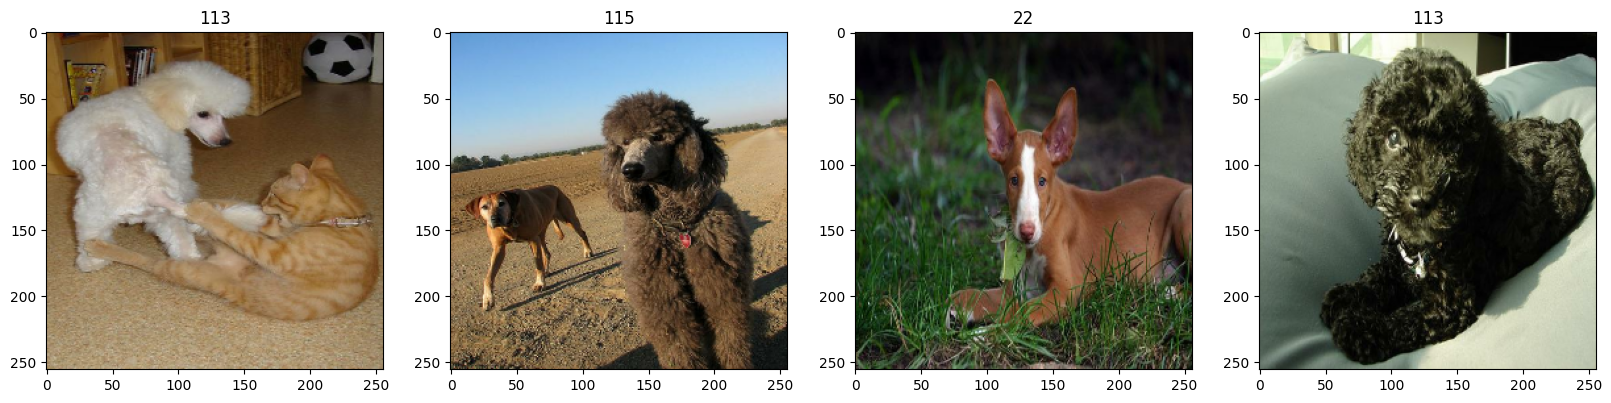

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.5981311 , 0.63342524, 0.4255821 ],
          [0.5990072 , 0.6343013 , 0.42645815],
          [0.6       , 0.63529414, 0.42745098],
          ...,
          [0.41875   , 0.42267156, 0.25012255],
          [0.41568628, 0.41960785, 0.2512255 ],
          [0.41395432, 0.4178759 , 0.25316998]],
 
         [[0.59607846, 0.6313726 , 0.42352942],
          [0.5971268 , 0.6324209 , 0.42457777],
          [0.59963137, 0.6349255 , 0.4270824 ],
          ...,
          [0.42267156, 0.42659312, 0.25404412],
          [0.4184197 , 0.42234126, 0.2539589 ],
          [0.41594955, 0.41987112, 0.25516525]],
 
         [[0.5921569 , 0.627451  , 0.41960785],
          [0.5932914 , 0.6285855 , 0.4207424 ],
          [0.59575003, 0.63104415, 0.42320102],
          ...,
          [0.42470226, 0.42862383, 0.2560748 ],
          [0.42144608, 0.42536765, 0.2569853 ],
          [0.41960785, 0.42352942, 0.25882354]],
 
         ...,
 
         [[0.930913  , 0.9548206 , 0.80466646],
          [0.93091

# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

450

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='softmax'))


In [30]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])




450/450 [==============================] - 89s 194ms/step - loss: 4.6708 - accuracy: 0.0284 - val_loss: 4.4245 - val_accuracy: 0.0535


# 8. Plot Performance

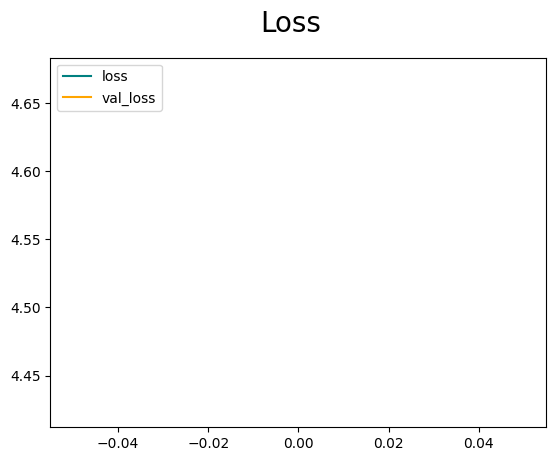

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

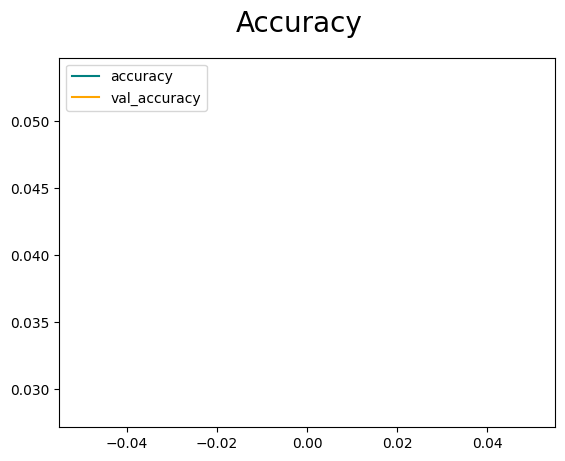

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 66ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.046875, shape=(), dtype=float32)


# 10. Test

In [41]:
import cv2
data = tf.keras.utils.image_dataset_from_directory('C:\\images\\dogs')
class_names = data.class_names
print(class_names)


Found 20580 files belonging to 120 classes.
['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094

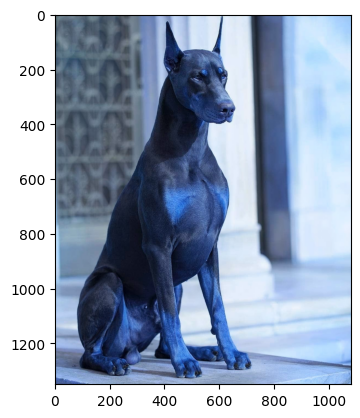

In [58]:
img = cv2.imread(r'C:\Users\sebas\OneDrive\Pictures\47893a779c4b9b3d0fa3b7f4b5f9a393.jpg')

plt.imshow(img)
plt.show()

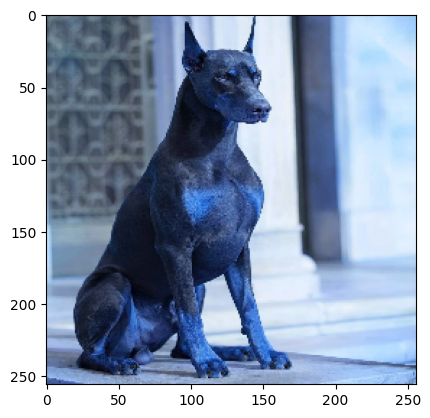

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat)

1/1 [==============================] - 0s 22ms/step


In [61]:
print(f'Predicted class is {class_names[predicted_class]}')

Predicted class is n02107683-Bernese_mountain_dog


In [121]:
if yhat > 1.5:
    print(f'Predicted class is healthy')
else:
    print(f'Predicted class is dermatites')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)